# 导入模块并创建数据

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1234)

In [5]:
%matplotlib inline

In [16]:
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, 200)

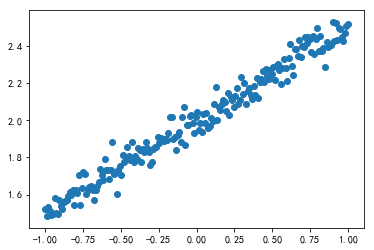

In [17]:
plt.scatter(X, Y)

In [19]:
X_train, Y_train = X[:160], Y[:160]
X_test, Y_test = X[160:], Y[160:]

# 建立模型

In [20]:
model = Sequential()
# model.add(Dense(output_dim=1, input_dim=1))
model.add(Dense(units=1, input_dim=1))

# 激活模型

In [21]:
model.compile(loss="mse", optimizer="sgd")

# 训练模型

In [22]:
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print("train cost: ", cost)

train cost:  4.0349464
train cost:  0.09366057
train cost:  0.009452853
train cost:  0.004033943


# 检验模型

In [23]:
cost = model.evaluate(X_test, Y_test, batch_size=40)
cost

40/40 [==============================] - 0s 750us/step


0.0030363963451236486

In [24]:
W, b = model.layers[0].get_weights()
W, b

(array([[0.43616888]], dtype=float32), array([1.9956682], dtype=float32))

# 可视化结果

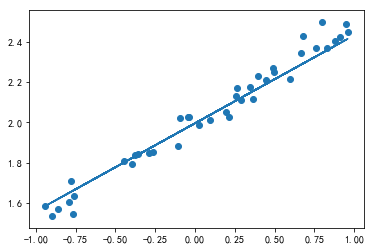

In [26]:
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)